# Análisis Exploratorio y Curación de Datos

**Todo ejercicio debe tener un análisis fundamentado en la teoría vista en la materia, dicho análisis sera parte del informe a entregar en pdf**

El *dataset* contiene las siguientes columnas:

- **rac y dec** = Posición angular, rac de 0 a 360 y dec de -90 a 90
- **Mag_u,Mag_g,Mag_r,Mag_i,Mag_z**= Estas variables representan una fracción de la luz total que observamos de las galaxias según su frecuencia (como por ejemplo, la frecuencia de radio, para más información [wiki](https://es.wikipedia.org/wiki/Espectro_visible))
- **z** = Es una medida de la distancia a la que se encuentra la galaxia
- **R** = Es una medida del tamaño de la galaxia
- **color**= Como su nombre lo indica es el color más predominante en la galaxia
- **elíptica, espiral, irregular**= Estas columnas identifican el tipo de morfología de las galaxias. Si el valor de una de estas tres columnas es 1, entonces la galaxia tiene esa morfología y las dos restantes tendran el valor 0. 

# Paquetes necesarios 

# AEyC

### Cargar el conjunto de datos 'galaxias1.csv' como un DataFrame, el mismo tiene las propiedades físicas de las galaxias.

- Definir el id como index del DataFrame
- Mostrar el tipo de dato de cada columna 
- Observar si hay filas e indices duplicados, en caso de encontrar valores duplicados decida si los mismos deben ser eliminados, justifique por qué.
- Realicen algunas exploraciones más sobre el dataset
- Remplaze los valores faltantes/NaN/carentes de sentido físico con **KNNImputer**
- Elimine los *outliers* de cada Feature (ver defición de valores atípicos o *outliers* en boxplot.pdf), indique el porcentaje de valores que se están eliminando
- Genere un nuevo DataFramen (df1). 

### Paquetes 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import numpy as np
import missingno as msno
%matplotlib inline

In [2]:
data = pd.read_csv('galaxias_1.csv', 
                   sep=',')

In [3]:
data

,objID,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroR90_r,z,Color,elliptical,spiral,uncertain
0,"1,23765119242489E+018",116.519097,39.886407,17.76235,16.72601,16.33972,16.06614,15.90478,8.393773,0.041521,-1.422625,0,1,0
1,"1,23765149575578E+018",116.451900,41.421270,18.12179,16.26214,15.39272,14.97515,14.65105,9.674847,0.040211,-2.729061,0,0,1
2,"1,23767370611537E+018",115.946713,41.918877,18.57293,17.42053,17.01788,16.75617,16.70899,11.277470,0.024386,-1.555044,0,0,1
3,"1,2376737066523E+018",116.051943,42.287231,21.37438,19.77335,19.55791,20.35405,18.88184,1.539542,0.039137,-1.816479,0,0,1
4,"1,23765127349266E+018",117.287392,43.434782,19.18845,17.99682,17.51119,17.26241,17.09056,12.471450,0.042591,-1.677259,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92097,"1,23765494945271E+018",245.038742,50.552353,19.65135,17.74399,16.86763,16.43538,16.09720,3.514471,0.048618,-2.783718,0,0,1
92098,"1,23765153764514E+018",219.313588,62.338577,18.77944,17.71890,17.35237,17.14414,17.04369,4.985637,0.036884,-1.427076,0,0,1
92099,"1,237655744025E+018",239.043213,4.601942,18.93000,17.34099,16.79838,16.53403,16.52089,13.324690,0.034145,-2.131620,0,1,0
92100,"1,23765546806247E+018",229.410394,0.947489,19.52601,17.68973,16.90745,16.50974,16.21097,4.854905,0.039585,-2.618553,0,0,1


Es necesario hacer esto antes de Definir el id como index del DataFrame.

In [4]:
clase=[]
for i in range(0,data.shape[0]):
    if data.elliptical[i]==1:
        clase.append('E')
    elif data.spiral[i]==1:
        clase.append('S')
    elif data.uncertain[i]==1:
        clase.append('I')
data['clase']=clase

Antes de setear el id como index observo que hay duplicados.

In [5]:

data.head(10)

,objID,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroR90_r,z,Color,elliptical,spiral,uncertain,clase
0,"1,23765119242489E+018",116.519097,39.886407,17.76235,16.72601,16.33972,16.06614,15.90478,8.393773,0.041521,-1.422625,0,1,0,S
1,"1,23765149575578E+018",116.451900,41.421270,18.12179,16.26214,15.39272,14.97515,14.65105,9.674847,0.040211,-2.729061,0,0,1,I
2,"1,23767370611537E+018",115.946713,41.918877,18.57293,17.42053,17.01788,16.75617,16.70899,11.277470,0.024386,-1.555044,0,0,1,I
3,"1,2376737066523E+018",116.051943,42.287231,21.37438,19.77335,19.55791,20.35405,18.88184,1.539542,0.039137,-1.816479,0,0,1,I
4,"1,23765127349266E+018",117.287392,43.434782,19.18845,17.99682,17.51119,17.26241,17.09056,12.471450,0.042591,-1.677259,0,0,1,I
5,"1,23765439217644E+018",118.240207,39.303836,19.59416,17.93481,17.08008,16.59757,16.25638,4.271867,0.040652,-2.514088,0,0,1,I
6,"1,23765119135154E+018",118.113313,40.326451,18.47173,17.38419,17.07661,16.86419,16.68099,8.146015,0.041786,-1.395113,0,0,1,I
7,"1,23765149629429E+018",118.716505,44.919518,18.47102,17.13574,16.62685,16.32869,16.24557,12.931770,0.045511,-1.844164,0,1,0,S
8,"1,23767370557974E+018",119.822479,42.008528,17.36539,15.46586,14.54658,14.07490,13.69937,18.121160,0.043644,-2.818807,1,0,0,E
9,"1,23767370557974E+018",119.822479,42.008528,17.36539,15.46586,14.54658,14.07490,13.69937,18.121160,0.043654,-2.818807,1,0,0,E


rapido vemos que las filas 8 y 9 tienen el mismo ID.

miramos los datatype, y notamos ademas que no hay valores faltantes.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92102 entries, 0 to 92101
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   objID       92102 non-null  object 
 1   ra          92102 non-null  float64
 2   dec         92102 non-null  float64
 3   modelMag_u  92102 non-null  float64
 4   modelMag_g  92102 non-null  float64
 5   modelMag_r  92102 non-null  float64
 6   modelMag_i  92102 non-null  float64
 7   modelMag_z  92102 non-null  float64
 8   petroR90_r  92102 non-null  float64
 9   z           92102 non-null  float64
 10  Color       92102 non-null  float64
 11  elliptical  92102 non-null  int64  
 12  spiral      92102 non-null  int64  
 13  uncertain   92102 non-null  int64  
 14  clase       92102 non-null  object 
dtypes: float64(10), int64(3), object(2)
memory usage: 10.5+ MB


####  busco eliminar los duplicados porque no tiene sentido utilizar dos veces el mismo dato.

In [7]:
data.shape

(92102, 15)

In [8]:
data = data.drop_duplicates(subset='objID') #dropeo duplicados utilizando como referencia el id
data.shape #miro con cuantos datos me queda el dataframe

(57681, 15)

#### Ahora seteamos el id como index del dataframe.

In [9]:
data = data.set_index('objID')
data

,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroR90_r,z,Color,elliptical,spiral,uncertain,clase
objID,,,,,,,,,,,,,,
"1,23765119242489E+018",116.519097,39.886407,17.76235,16.72601,16.33972,16.06614,15.90478,8.393773,0.041521,-1.422625,0,1,0,S
"1,23765149575578E+018",116.451900,41.421270,18.12179,16.26214,15.39272,14.97515,14.65105,9.674847,0.040211,-2.729061,0,0,1,I
"1,23767370611537E+018",115.946713,41.918877,18.57293,17.42053,17.01788,16.75617,16.70899,11.277470,0.024386,-1.555044,0,0,1,I
"1,2376737066523E+018",116.051943,42.287231,21.37438,19.77335,19.55791,20.35405,18.88184,1.539542,0.039137,-1.816479,0,0,1,I
"1,23765127349266E+018",117.287392,43.434782,19.18845,17.99682,17.51119,17.26241,17.09056,12.471450,0.042591,-1.677259,0,0,1,I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1,23766556715083E+018",231.130092,18.628772,18.31966,16.61474,15.80569,15.41106,15.11063,9.954793,0.029269,-2.513965,1,0,0,E
"1,23765495320163E+018",245.132716,49.797424,18.05554,17.05332,16.70874,16.50322,16.34947,9.012850,0.040825,-1.346800,0,0,1,I
"1,23765494945271E+018",245.038742,50.552353,19.65135,17.74399,16.86763,16.43538,16.09720,3.514471,0.048618,-2.783718,0,0,1,I


## otras exploraciones...

In [10]:
data.describe()

,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroR90_r,z,Color,elliptical,spiral,uncertain
count,57681.000000,57681.000000,57681.000000,57681.000000,57681.000000,57681.000000,57681.000000,57681.000000,57681.000000,57681.000000,57681.000000,57681.000000,57681.000000
mean,183.419958,25.380842,183.765182,172.718436,162.646477,170.157392,136.560776,54.057630,0.035991,-3.416101,0.074409,0.344481,0.581110
std,57.659031,18.616160,1734.388143,1622.623065,1540.039554,1568.942667,1383.827414,882.310694,0.008498,72.031187,0.262438,0.475203,0.493382
min,0.008745,-11.202394,-9999.000000,-9999.000000,11.902330,11.459980,-9999.000000,0.842248,0.020001,-2859.000000,0.000000,0.000000,0.000000
25%,151.447181,10.476006,17.752040,16.314860,15.647160,15.287560,15.006410,6.132339,0.028957,-2.431772,0.000000,0.000000,0.000000
50%,183.931359,23.898519,18.447040,17.119080,16.555560,16.247150,16.020130,8.386065,0.036099,-1.898378,0.000000,0.000000,1.000000
75%,221.634978,39.408083,19.011310,17.738920,17.255280,16.983440,16.798670,11.335120,0.043573,-1.570280,0.000000,1.000000,1.000000
max,359.965567,70.133213,25756.000000,20542.000000,19138.000000,23871.000000,20767.000000,78255.000000,0.050000,10015.860000,1.000000,1.000000,1.000000


vemos de nuevo los valores de -9999 y de 10015.86, en la variable color tambien hay un minimo de -2859.

Miro boxplots...

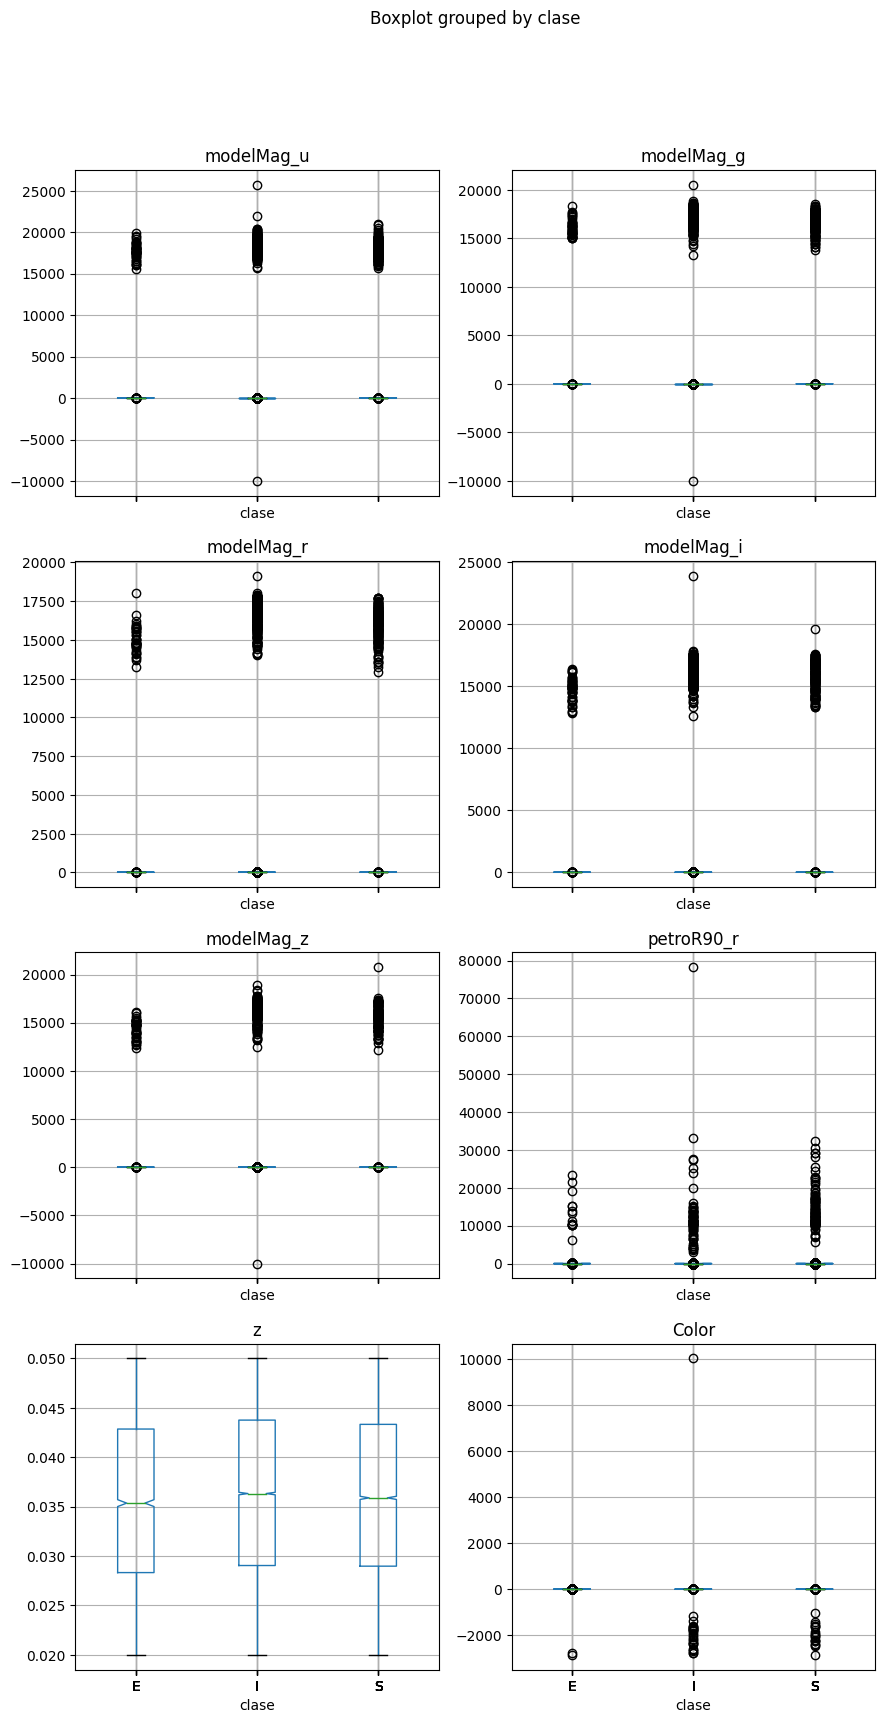

In [11]:
fig, ax = plt.subplots(4, 2,sharex=True, figsize=(10, 20))
data.boxplot('modelMag_u','clase',notch=True, ax=ax[0][0])
data.boxplot('modelMag_g','clase',notch=True, ax=ax[0][1])
data.boxplot('modelMag_r','clase',notch=True, ax=ax[1][0])
data.boxplot('modelMag_i','clase',notch=True, ax=ax[1][1])
data.boxplot('modelMag_z','clase',notch=True, ax=ax[2][0])
data.boxplot('petroR90_r','clase',notch=True, ax=ax[2][1])
data.boxplot('z','clase', notch=True,ax=ax[3][0])
data.boxplot('Color','clase',notch=True, ax=ax[3][1])
plt.savefig('imagen/boxplot.png')

 #### lo primero que resalta en estos boxplot es que hay muchisimos datos con magnitudes elevadas, lo cual no tiene sentido fisico ya que mientras mas alta la magnitud mas debil el objeto, y magnitudes de 10000 son imposibles de detectar. Por ejemplo, el telescopio Pan-STARRS de hawaii tiene una magnitud limite de 24.

In [12]:
data[data['modelMag_z']>19] #tenemos 

,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroR90_r,z,Color,elliptical,spiral,uncertain,clase
objID,,,,,,,,,,,,,,
"1,23765842353901E+018",126.194607,3.772450,19.02475,17.88916,17.45983,17.22953,17076.00000,5.633001,0.035114,-1.564924,0,0,1,I
"1,23766732272809E+018",205.324716,25.713591,18.55107,17.60185,17.21901,17.04464,16866.00000,5.529673,0.028324,-1.332060,0,0,1,I
"1,23765914455815E+018",210.754636,56.595806,19.03890,17.72025,17.14367,16.81314,16602.00000,4.417403,0.041212,-1.895231,0,0,1,I
"1,23767370611569E+018",116.821205,42.082342,22.11735,20.68927,19.99911,19.86847,19.63993,1.420692,0.028140,-2.118233,0,0,1,I
"1,23766196849921E+018",170.458442,42.462408,17.63293,16.55140,16.13713,15.91924,15738.00000,10.432690,0.024641,-1.495804,0,1,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1,23765649456372E+018",329.563669,11.490230,17.23247,15.72444,14.93893,14.53259,14191.00000,10.355370,0.031054,-2.293537,0,1,0,S
"1,23766263691136E+018",237.767784,9.115903,18.64422,17.34979,16.77861,16.45554,16202.00000,4.810450,0.043245,-1.865610,0,0,1,I
"1,23767465099736E+018",168.379962,0.505805,18.44548,17.47041,17.05026,16.84231,16684.00000,7.704356,0.029553,-1.395224,0,0,1,I


A continuacion miro de cerca algunos valores atipicos, esto no es nada relevante.

In [13]:
data[data['Color']>10] #este dato tiene muchas variables carentes de sentido, no solo el color.

,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroR90_r,z,Color,elliptical,spiral,uncertain,clase
objID,,,,,,,,,,,,,,
"1,2376487035148E+018",209.589671,-0.625217,-9999.0,-9999.0,16.85656,16.53999,-9999.0,6.973291,0.027598,10015.86,0,0,1,I


In [14]:
data[data['petroR90_r']>70000] #la unica anomalia de este dato esta en el tamaño

,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroR90_r,z,Color,elliptical,spiral,uncertain,clase
objID,,,,,,,,,,,,,,
"1,23766378421649E+018",43.707859,0.040968,17.38318,15.70524,14.96634,14.5301,14.21008,78255.0,0.041095,-2.416843,0,0,1,I


In [15]:
data[data['modelMag_z']<-5000] #este dato es el mismo dato anomalo de la variable color

,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroR90_r,z,Color,elliptical,spiral,uncertain,clase
objID,,,,,,,,,,,,,,
"1,2376487035148E+018",209.589671,-0.625217,-9999.0,-9999.0,16.85656,16.53999,-9999.0,6.973291,0.027598,10015.86,0,0,1,I


In [16]:
data[data['modelMag_i']>19000] #a estos los puedo considerar outliers simplemente,
                               #aunque el primer dato tiene pinta de anormal.

,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroR90_r,z,Color,elliptical,spiral,uncertain,clase
objID,,,,,,,,,,,,,,
"1,23766223748071E+018",217.938535,8.290958,20.36873,19.29713,20.14230,23871.0,18.82917,2.507162,0.029891,-0.226438,0,0,1,I
"1,23766630055838E+018",56.615146,-0.033488,24.70692,21.09019,17.51249,19575.0,19.03318,5.763434,0.037699,-7.194427,0,1,0,S


### Para realizar knn tengo que primero asignarle valor Nan a los datos que quiero imputar. Decido asignarle Nan a todas las magnitudes visuales mayores a 20, no importa si son valores extremos como los vistos en las celdas de arriba, los tomo a todos por igual y luego los imputo usando knn. Tambien le asigno Nan al valor atipico de petroR90_r

In [17]:
data.loc[(data.modelMag_u >20), 'modelMag_u'] = np.nan 
data.loc[(data.modelMag_g >20), 'modelMag_g'] = np.nan 
data.loc[(data.modelMag_r >20), 'modelMag_r'] = np.nan 
data.loc[(data.modelMag_i >20), 'modelMag_i'] = np.nan 
data.loc[(data.Color >20), 'Color'] = np.nan 
data.loc[(data.modelMag_z >20), 'modelMag_z'] = np.nan 
data.loc[(data.petroR90_r >70000), 'petroR90_r'] = np.nan 

Miro con cuantos datos queda cada variable...

In [18]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 57681 entries, 1,23765119242489E+018 to 1,237655744025E+018
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ra          57681 non-null  float64
 1   dec         57681 non-null  float64
 2   modelMag_u  55949 non-null  float64
 3   modelMag_g  57052 non-null  float64
 4   modelMag_r  57138 non-null  float64
 5   modelMag_i  57079 non-null  float64
 6   modelMag_z  57186 non-null  float64
 7   petroR90_r  57680 non-null  float64
 8   z           57681 non-null  float64
 9   Color       57680 non-null  float64
 10  elliptical  57681 non-null  int64  
 11  spiral      57681 non-null  int64  
 12  uncertain   57681 non-null  int64  
 13  clase       57681 non-null  object 
dtypes: float64(10), int64(3), object(1)
memory usage: 6.6+ MB


Miro nuevamente los boxplot para ver como se distribuyen los datos

<Axes: title={'center': 'Color'}, xlabel='clase'>

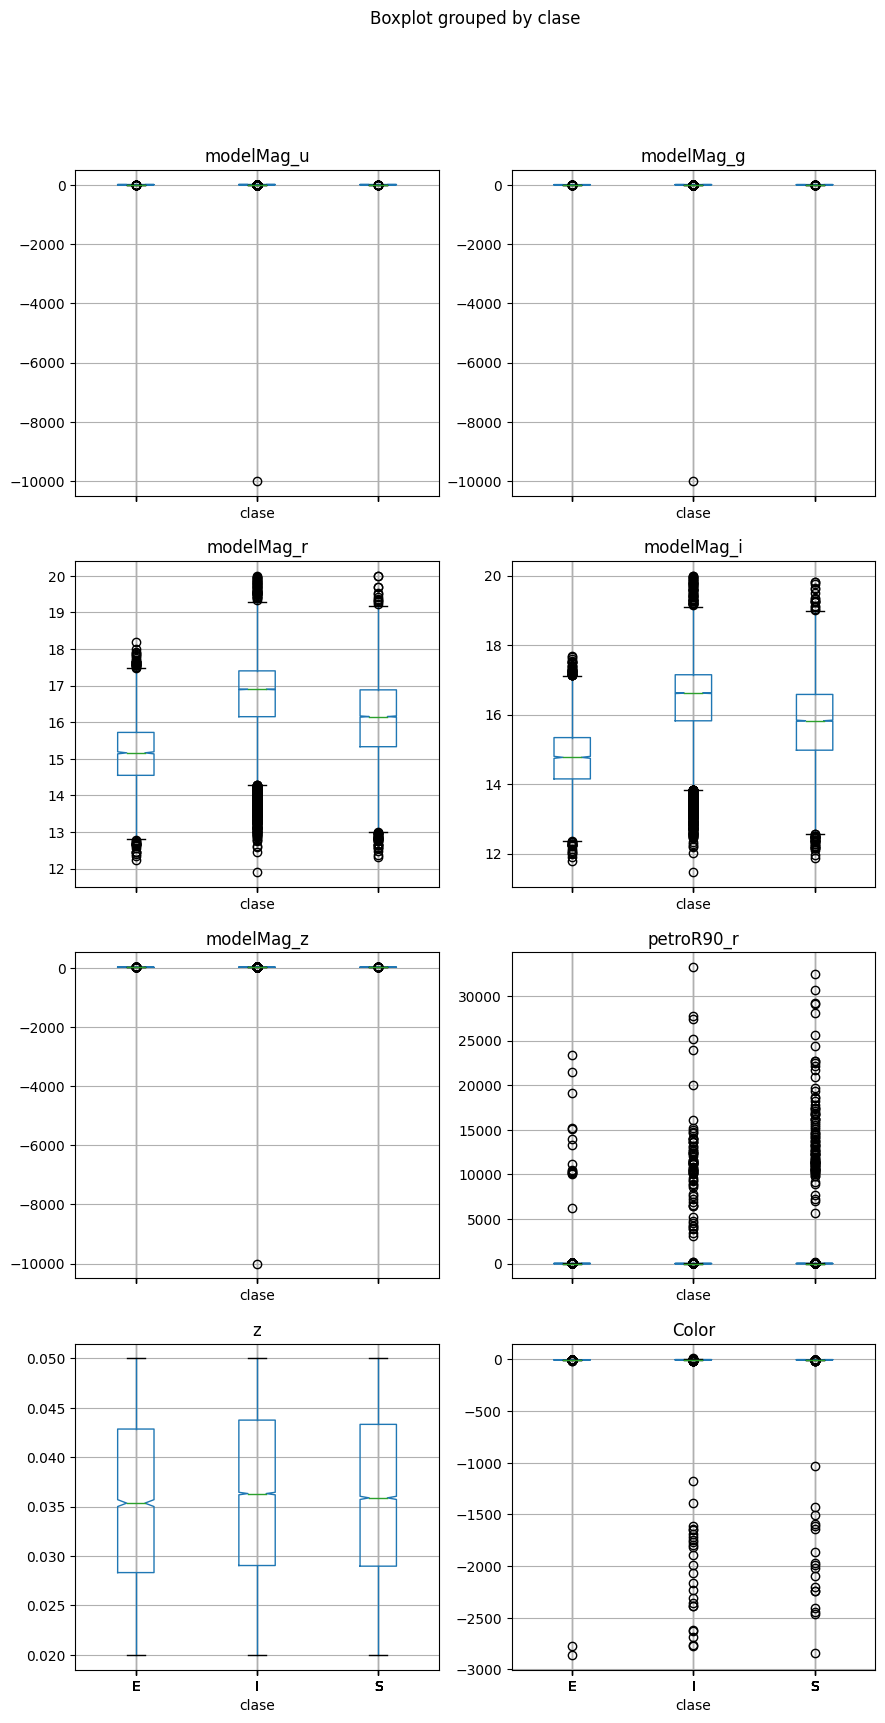

In [19]:
fig, ax = plt.subplots(4, 2,sharex=True, figsize=(10, 20))
data.boxplot('modelMag_u','clase',notch=True, ax=ax[0][0])
data.boxplot('modelMag_g','clase',notch=True, ax=ax[0][1])
data.boxplot('modelMag_r','clase',notch=True, ax=ax[1][0])
data.boxplot('modelMag_i','clase',notch=True, ax=ax[1][1])
data.boxplot('modelMag_z','clase',notch=True, ax=ax[2][0])
data.boxplot('petroR90_r','clase',notch=True, ax=ax[2][1])
data.boxplot('z','clase', notch=True,ax=ax[3][0])
data.boxplot('Color','clase',notch=True, ax=ax[3][1])
#plt.savefig('imagen/boxplot.png')

Observo que todavia hay valores de magnitud que son atipicos y procedo a asignarle valor Nan en el codigo de abajo. Notar que a la petroR90_r la dejo intacta porque no entiendo el significado de esa variable y no puedo decir que valores son esperables y cuales no. Vanesa nos comento que esta variable no tendria un impacto en el estudio asi que elijo no tocarla.

In [20]:
data.loc[(data.modelMag_u <0), 'modelMag_u'] = np.nan 
data.loc[(data.modelMag_g <0), 'modelMag_g'] = np.nan 
data.loc[(data.modelMag_r <0), 'modelMag_r'] = np.nan 
data.loc[(data.modelMag_i <0), 'modelMag_i'] = np.nan 
data.loc[(data.Color <-100), 'Color'] = np.nan 
data.loc[(data.modelMag_z <0), 'modelMag_z'] = np.nan 
data.loc[(data.petroR90_r >70000), 'petroR90_r'] = np.nan 

miramos nuevamente los boxplot

<Axes: title={'center': 'Color'}, xlabel='clase'>

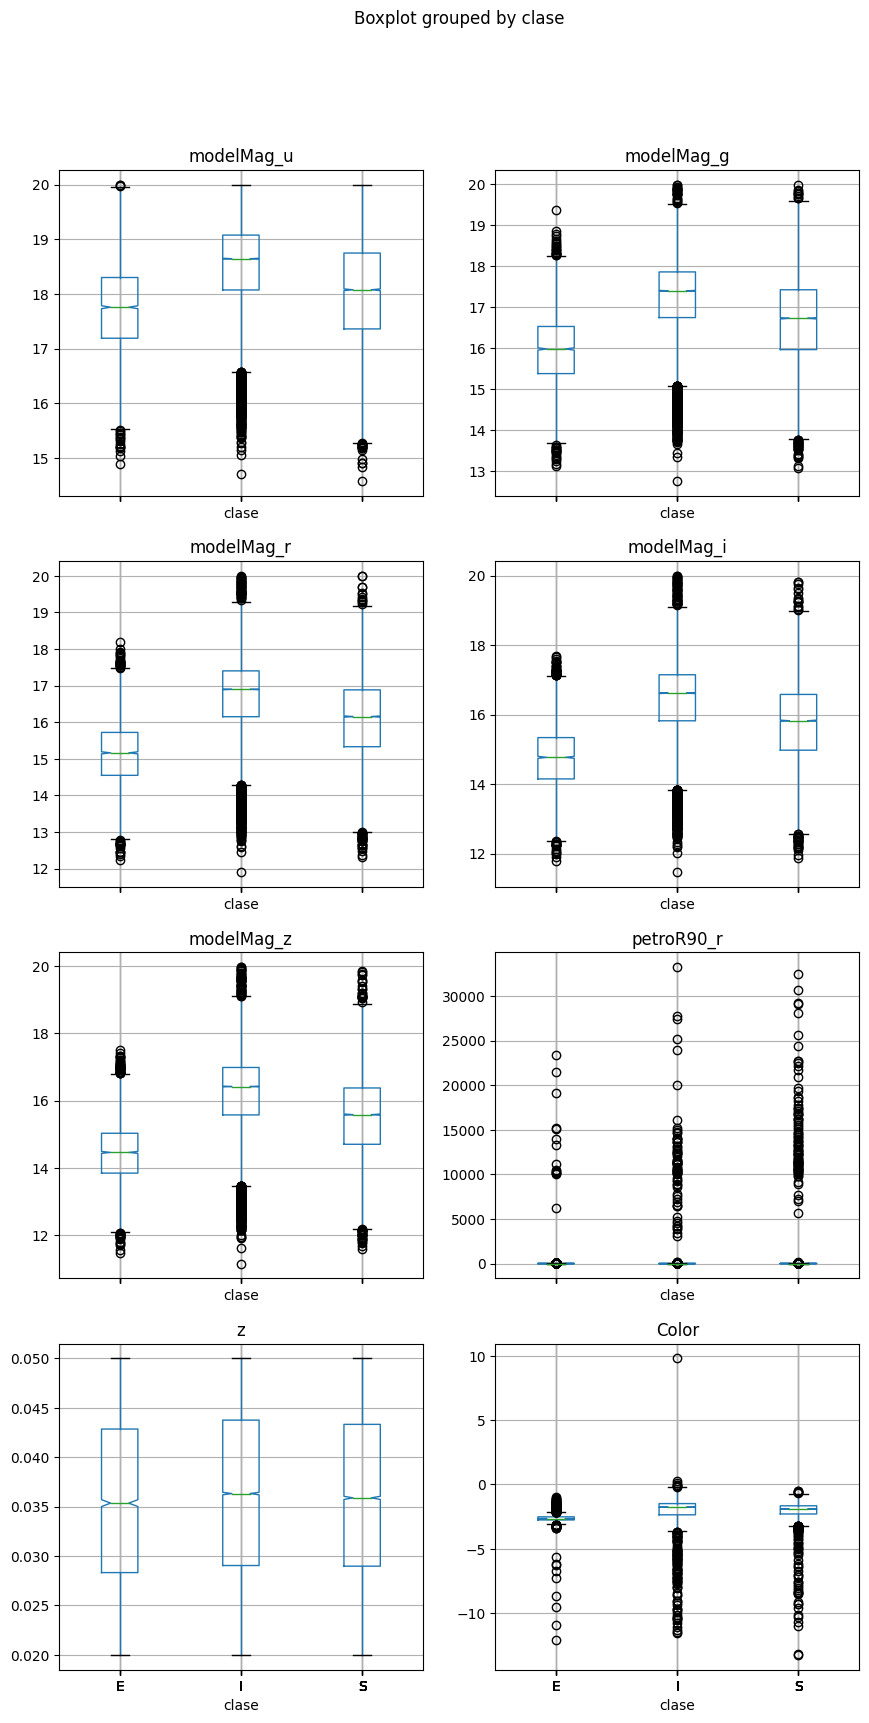

In [21]:
fig, ax = plt.subplots(4, 2,sharex=True, figsize=(10, 20))
data.boxplot('modelMag_u','clase',notch=True, ax=ax[0][0])
data.boxplot('modelMag_g','clase',notch=True, ax=ax[0][1])
data.boxplot('modelMag_r','clase',notch=True, ax=ax[1][0])
data.boxplot('modelMag_i','clase',notch=True, ax=ax[1][1])
data.boxplot('modelMag_z','clase',notch=True, ax=ax[2][0])
data.boxplot('petroR90_r','clase',notch=True, ax=ax[2][1])
data.boxplot('z','clase', notch=True,ax=ax[3][0])
data.boxplot('Color','clase',notch=True, ax=ax[3][1])
#plt.savefig('imagen/boxplot.png')

In [22]:
data[data['Color']>9] #veo que todavia me queda ese dato como atipico y decido darle un Nan aunque podria simplemente filtrarlo 
                      #como outlier  

,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroR90_r,z,Color,elliptical,spiral,uncertain,clase
objID,,,,,,,,,,,,,,
"1,23766197655365E+018",199.877073,7.893786,18.11104,NaN,NaN,16.3607,14.56817,4.490848,0.046185,9.800438,0,0,1,I


In [23]:
data.loc[(data.Color >9), 'Color'] = np.nan #se le asigna valor Nan a ese dato atipico tal como se comento en la celda de arriba

Finalmente el dataframe queda distribuido como sigue.

<Axes: title={'center': 'Color'}, xlabel='clase'>

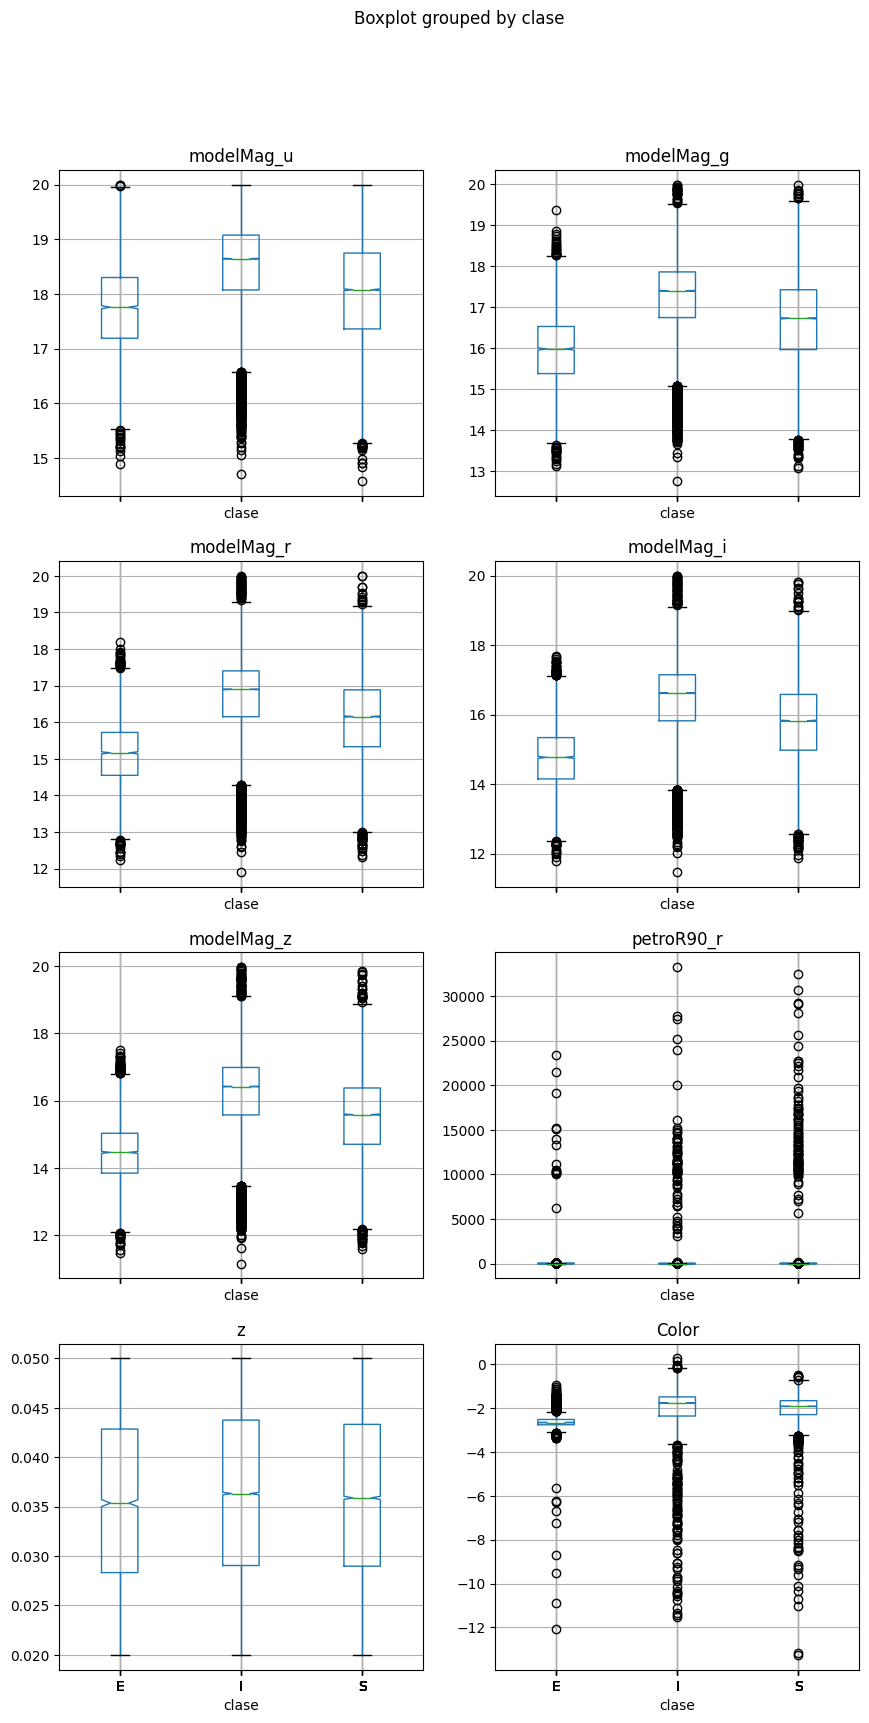

In [24]:
fig, ax = plt.subplots(4, 2,sharex=True, figsize=(10, 20))
data.boxplot('modelMag_u','clase',notch=True, ax=ax[0][0])
data.boxplot('modelMag_g','clase',notch=True, ax=ax[0][1])
data.boxplot('modelMag_r','clase',notch=True, ax=ax[1][0])
data.boxplot('modelMag_i','clase',notch=True, ax=ax[1][1])
data.boxplot('modelMag_z','clase',notch=True, ax=ax[2][0])
data.boxplot('petroR90_r','clase',notch=True, ax=ax[2][1])
data.boxplot('z','clase', notch=True,ax=ax[3][0])
data.boxplot('Color','clase',notch=True, ax=ax[3][1])
#plt.savefig('imagen/boxplot.png')

### Para hacer knn tengo que escalar los datos, pero para escalarlos necesito eliminar outliers, (podria no hacerlo, si elijo utilizar un escalador robusto, pero ya que en algun momento hay que hacer eliminacion de outiers prefiero hacerlo ahora)

In [25]:
data.isna().sum().sum() #cuento los Nan para asegurarme que la eliminacion de outliers
                        #no elimine tmb los Nan ya que vamos a imputarlos

4052

Eliminacion de outliers para hacer knn

In [26]:
cols = ['modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i', 'modelMag_z', 'petroR90_r', 'z',
       'Color']
Q1 = data.quantile(0.25,numeric_only=True)
Q3 = data.quantile(0.75,numeric_only=True)
IQR = Q3 - Q1

data_clean = data[~((data[cols] < (Q1 - 2.5 * IQR)) |(data[cols] > (Q3 + 2.5 * IQR))).any(axis=1)].copy()

C:\Users\joaqu\AppData\Local\Temp\ipykernel_9100\398611876.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_clean = data[~((data[cols] < (Q1 - 2.5 * IQR)) |(data[cols] > (Q3 + 2.5 * IQR))).any(axis=1)].copy()
C:\Users\joaqu\AppData\Local\Temp\ipykernel_9100\398611876.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_clean = data[~((data[cols] < (Q1 - 2.5 * IQR)) |(data[cols] > (Q3 + 2.5 * IQR))).any(axis=1)].copy()


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57681 entries, 1,23765119242489E+018 to 1,237655744025E+018
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ra          57681 non-null  float64
 1   dec         57681 non-null  float64
 2   modelMag_u  55948 non-null  float64
 3   modelMag_g  57051 non-null  float64
 4   modelMag_r  57138 non-null  float64
 5   modelMag_i  57079 non-null  float64
 6   modelMag_z  57185 non-null  float64
 7   petroR90_r  57680 non-null  float64
 8   z           57681 non-null  float64
 9   Color       57634 non-null  float64
 10  elliptical  57681 non-null  int64  
 11  spiral      57681 non-null  int64  
 12  uncertain   57681 non-null  int64  
 13  clase       57681 non-null  object 
dtypes: float64(10), int64(3), object(1)
memory usage: 6.6+ MB


In [28]:
data

,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroR90_r,z,Color,elliptical,spiral,uncertain,clase
objID,,,,,,,,,,,,,,
"1,23765119242489E+018",116.519097,39.886407,17.76235,16.72601,16.33972,16.06614,15.90478,8.393773,0.041521,-1.422625,0,1,0,S
"1,23765149575578E+018",116.451900,41.421270,18.12179,16.26214,15.39272,14.97515,14.65105,9.674847,0.040211,-2.729061,0,0,1,I
"1,23767370611537E+018",115.946713,41.918877,18.57293,17.42053,17.01788,16.75617,16.70899,11.277470,0.024386,-1.555044,0,0,1,I
"1,2376737066523E+018",116.051943,42.287231,NaN,19.77335,19.55791,NaN,18.88184,1.539542,0.039137,-1.816479,0,0,1,I
"1,23765127349266E+018",117.287392,43.434782,19.18845,17.99682,17.51119,17.26241,17.09056,12.471450,0.042591,-1.677259,0,0,1,I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1,23766556715083E+018",231.130092,18.628772,18.31966,16.61474,15.80569,15.41106,15.11063,9.954793,0.029269,-2.513965,1,0,0,E
"1,23765495320163E+018",245.132716,49.797424,18.05554,17.05332,16.70874,16.50322,16.34947,9.012850,0.040825,-1.346800,0,0,1,I
"1,23765494945271E+018",245.038742,50.552353,19.65135,17.74399,16.86763,16.43538,16.09720,3.514471,0.048618,-2.783718,0,0,1,I


Compruebo que no se eliminarn los Nan del dataframe.

In [29]:
data.isna().sum().sum() #no hubo eliminacion de Nan

4052

Finalmente el dataframe queda distribuido como sigue, y sin outliers.

<Axes: title={'center': 'Color'}, xlabel='clase'>

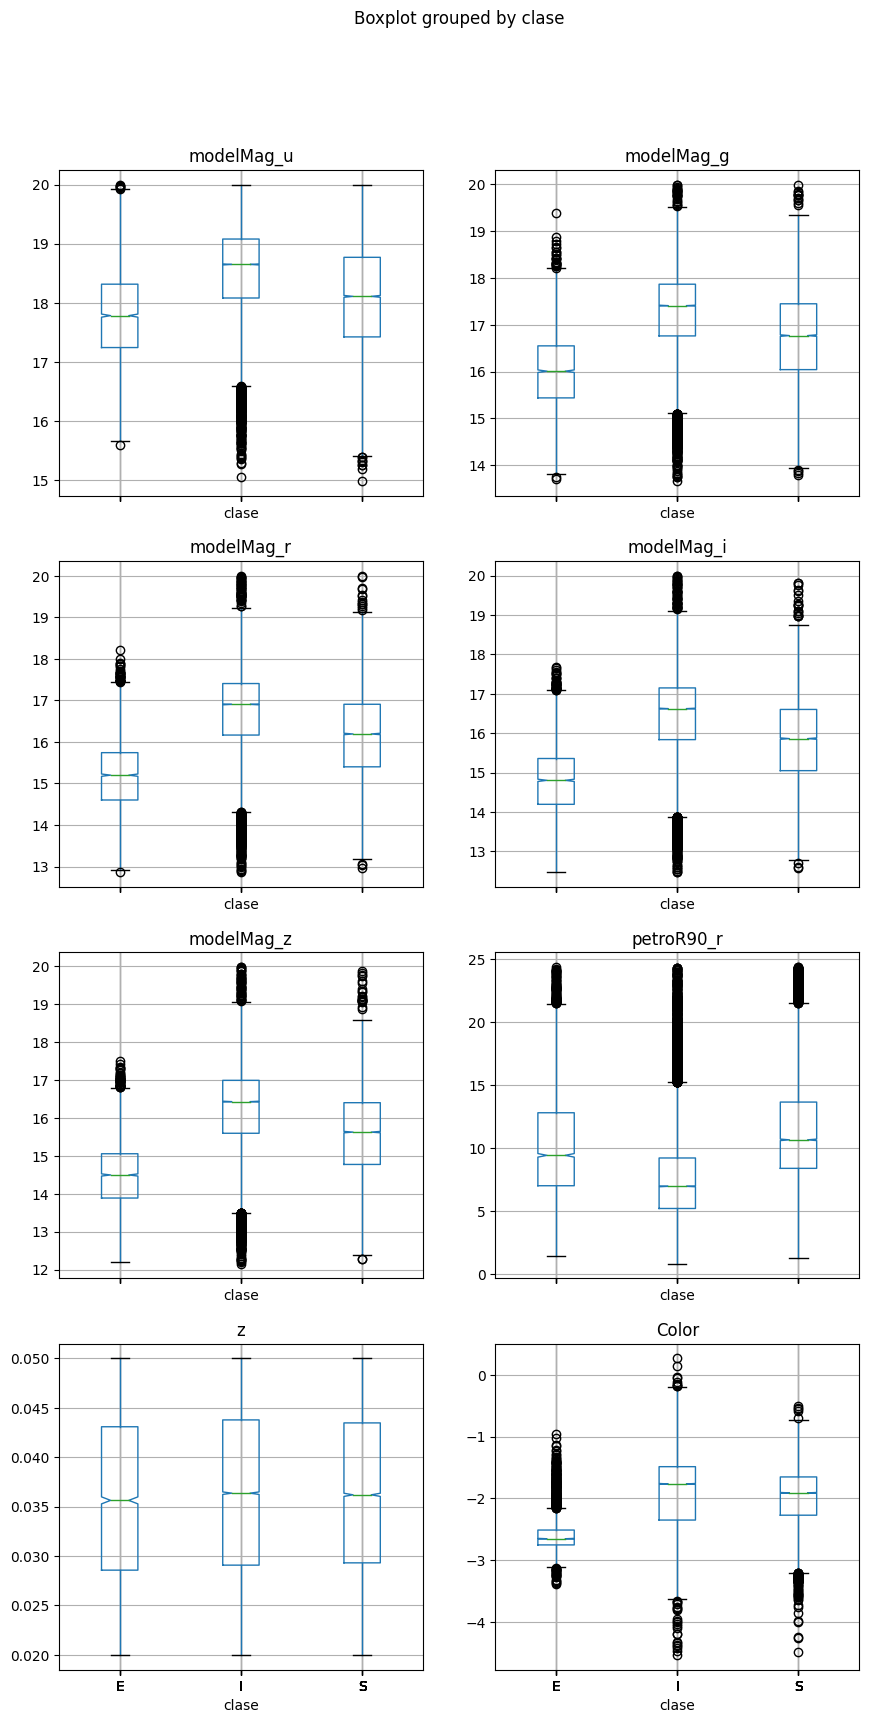

In [30]:
fig, ax = plt.subplots(4, 2,sharex=True, figsize=(10, 20))
data_clean.boxplot('modelMag_u','clase',notch=True, ax=ax[0][0])
data_clean.boxplot('modelMag_g','clase',notch=True, ax=ax[0][1])
data_clean.boxplot('modelMag_r','clase',notch=True, ax=ax[1][0])
data_clean.boxplot('modelMag_i','clase',notch=True, ax=ax[1][1])
data_clean.boxplot('modelMag_z','clase',notch=True, ax=ax[2][0])
data_clean.boxplot('petroR90_r','clase',notch=True, ax=ax[2][1])
data_clean.boxplot('z','clase', notch=True,ax=ax[3][0])
data_clean.boxplot('Color','clase',notch=True, ax=ax[3][1])
#plt.savefig('imagen/boxplot.png')

### Ahora quiero analizar como se distribuyen los valores faltantes. 

In [31]:
relevant_columns =['modelMag_u','modelMag_g','modelMag_r','modelMag_i','modelMag_z','petroR90_r','Color','z']

https://stackoverflow.com/questions/75525029/msno-matrix-shows-an-error-when-i-use-any-venv-using-pyenv
EN ESA PAGINA ESTA COMO SOLUCIONAR EL ERROR QUE PUEDE TIRAR LA MATRIZ DE MSNO

<Axes: >

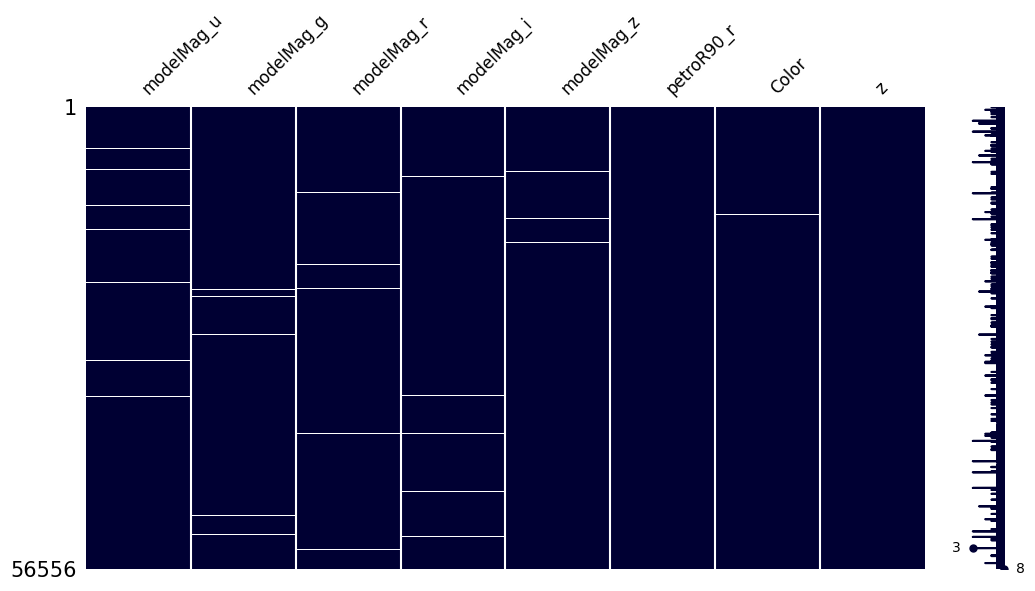

In [32]:
data_msno = data_clean[relevant_columns] #las linas blancas represetan los datos faltantes.
msno.matrix(
    data_msno, figsize=(12, 6), fontsize=12, color=[0, 0, 0.2]
)  

https://stackoverflow.com/questions/75525029/msno-matrix-shows-an-error-when-i-use-any-venv-using-pyenv

Veo que las variables mas completas son `'z','color' y 'petroR90_r'`

In [33]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

#### Procedemos a escalar los datos.

In [34]:
#relevant_columns =['modelMag_u','modelMag_g','modelMag_r','modelMag_i','modelMag_z','petroR90_r','Color','z']
columns_to_use = relevant_columns

scaler = MinMaxScaler()
data_clean[columns_to_use] = scaler.fit_transform(data_clean[columns_to_use])

#### Chequeamos el escalamiento

<Axes: title={'center': 'Color'}, xlabel='clase'>

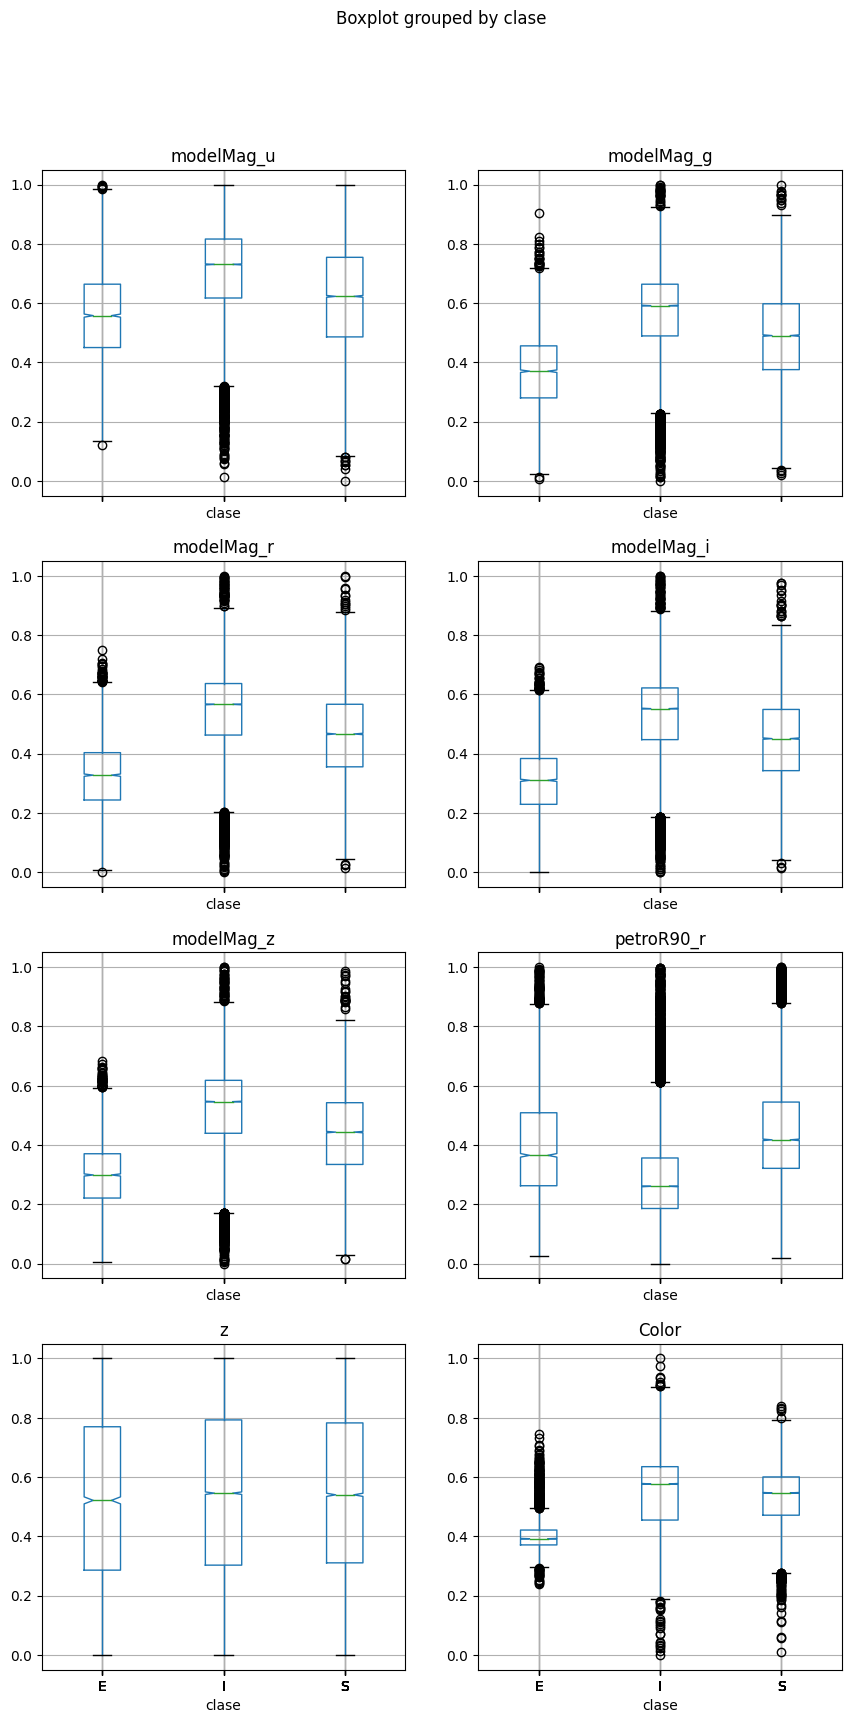

In [35]:
fig, ax = plt.subplots(4, 2,sharex=True, figsize=(10, 20))
data_clean.boxplot('modelMag_u','clase',notch=True, ax=ax[0][0])
data_clean.boxplot('modelMag_g','clase',notch=True, ax=ax[0][1])
data_clean.boxplot('modelMag_r','clase',notch=True, ax=ax[1][0])
data_clean.boxplot('modelMag_i','clase',notch=True, ax=ax[1][1])
data_clean.boxplot('modelMag_z','clase',notch=True, ax=ax[2][0])
data_clean.boxplot('petroR90_r','clase',notch=True, ax=ax[2][1])
data_clean.boxplot('z','clase', notch=True,ax=ax[3][0])
data_clean.boxplot('Color','clase',notch=True, ax=ax[3][1])
#plt.savefig('imagen/boxplot.png')

### A continuacion se imputan los datos faltantes, utilizando todas las variables para ajustar.

In [36]:
data_clean_imputada =data_clean.copy(deep=True)

In [37]:
imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
data_clean_imputada[columns_to_use] = imputer.fit_transform(
    data_clean_imputada[columns_to_use]
)

C:\Users\joaqu\AppData\Roaming\Python\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


<Axes: >

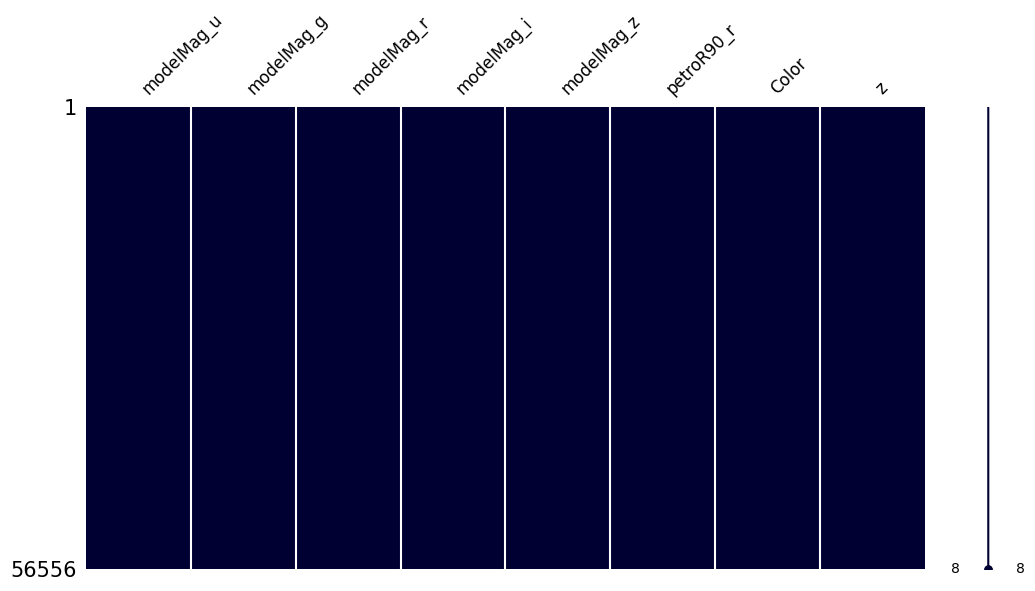

In [38]:
data_msno = data_clean_imputada[relevant_columns]
msno.matrix(
    data_msno, figsize=(12, 6), fontsize=12, color=[0, 0, 0.2]
)  # out of context checking for lost values

### Para chequear que la imputacion sea efectiva, se comparan las curvas de densidad de las variables imputadas, con las curvas de densidad de las variables originales sin imputar

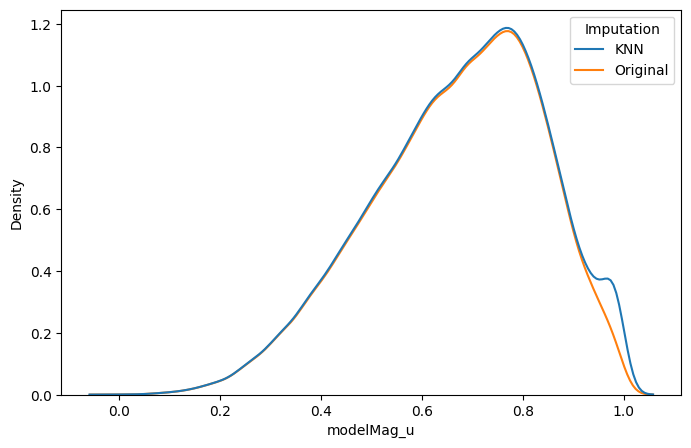

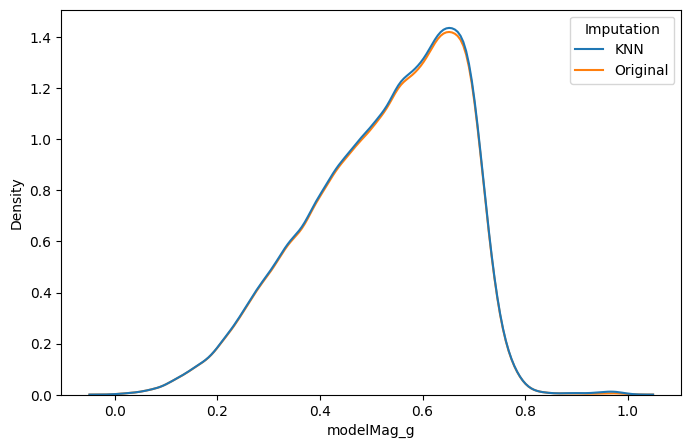

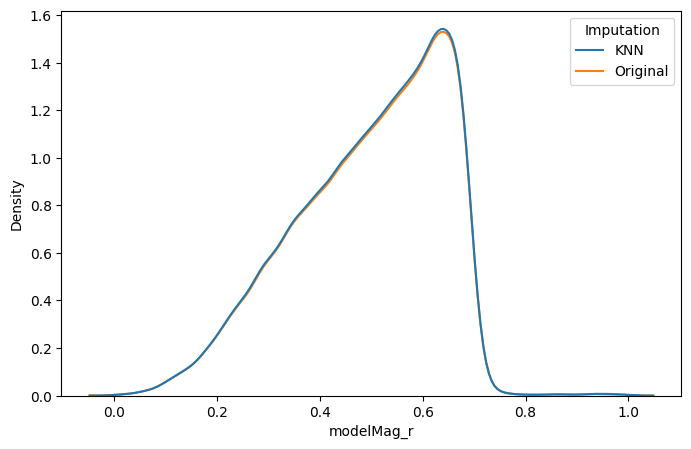

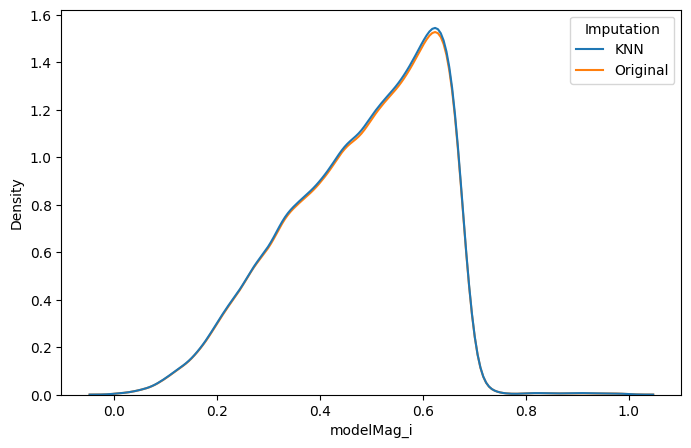

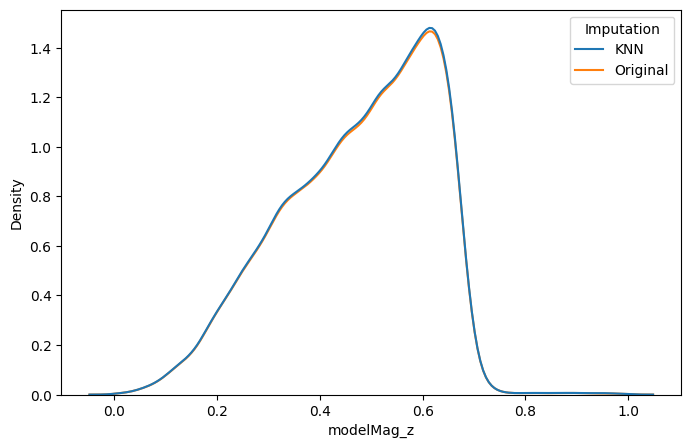

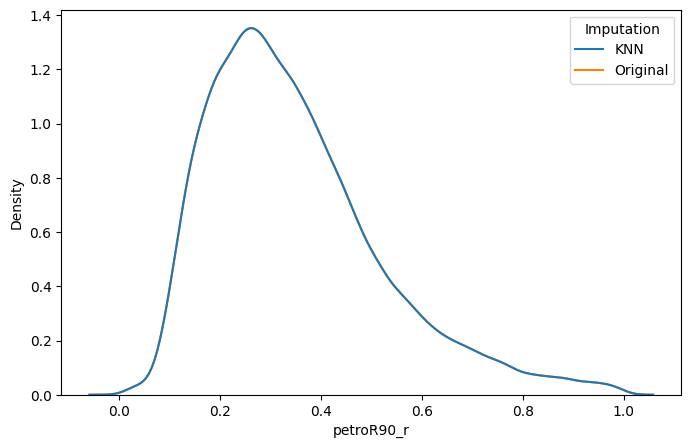

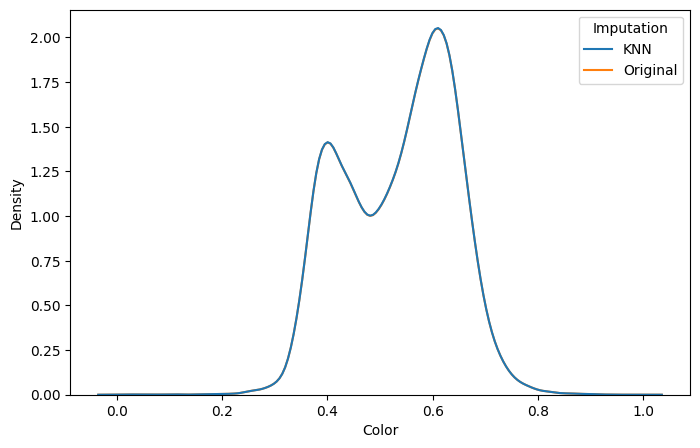

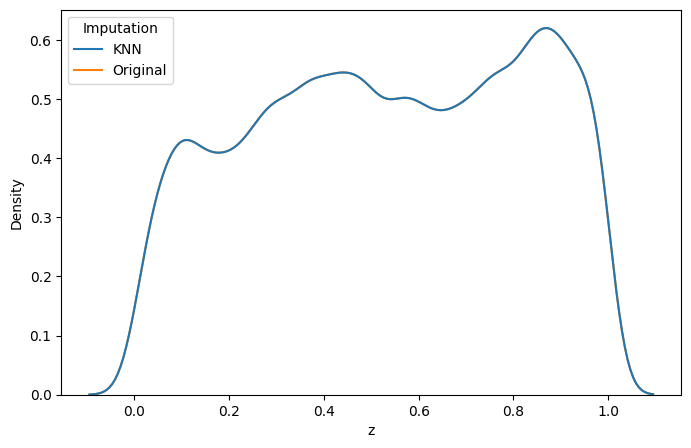

In [39]:

for column in columns_to_use: 
    imputado = data_clean_imputada[column].copy().to_frame()
    imputado['Imputation'] = 'KNN'
    original = data_clean[column].dropna().copy().to_frame()
    original['Imputation'] = 'Original'
    data1 = pd.concat([imputado, original])
    data1=data1.reset_index()
    fig = plt.figure(figsize=(8, 5))
    g = sns.kdeplot(data=data1, x=column, hue='Imputation')
    %matplotlib inline

### Se obseva que la variable modelMag_u no ajusta del todo bien y cambia la forma de la curva, asi que a continuacion se intenta otra estratega de imputacion eligiendo diferentes variables

In [40]:
data_clean_imputada2 =data_clean.copy(deep=True)

#### Probando diferentes combinaciones, se encontro el mejor resultado al imputar primero la variable `'modelMag_u'` utilizando las variables `'Color'` y `'petroR90_r'`. Luego se imputan el resto de las variables todas juntas.

In [41]:
columns_to_use = ['modelMag_u','Color','petroR90_r']
imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
data_clean_imputada2[columns_to_use] = imputer.fit_transform(
    data_clean_imputada2[columns_to_use]
)
columns_to_use = ['modelMag_u','modelMag_g','modelMag_r','modelMag_i','modelMag_z','petroR90_r','Color','z']
data_clean_imputada2[columns_to_use] = imputer.fit_transform(
    data_clean_imputada2[columns_to_use]
)

C:\Users\joaqu\AppData\Roaming\Python\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


#### Chequeando las densidades, se observa que la densidad de modelMag_u sigue estando alejada de la original, pero lo importante es que la curva sigue la misma forma. La curva de knn siempre va a estar por encima de la curva original porque justamente esa curva tiene mas datos, asi que el resultado es bueno. El resto de variables ajustan muy bien.

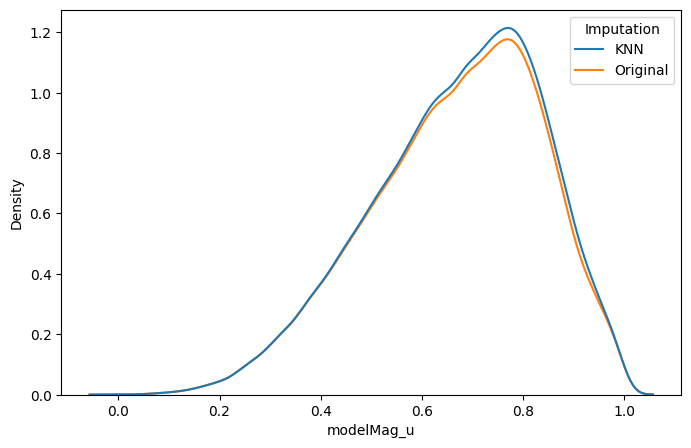

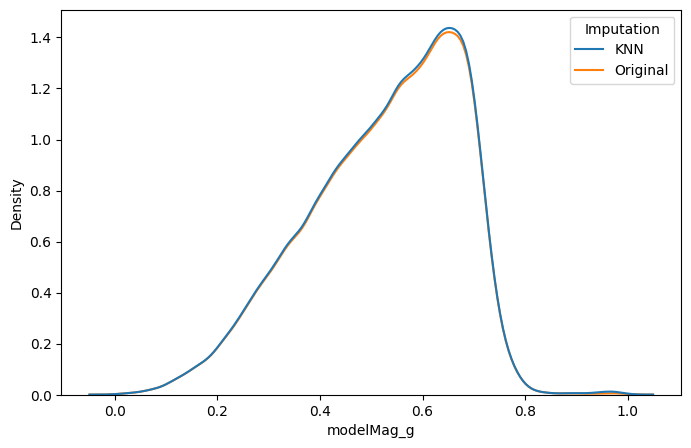

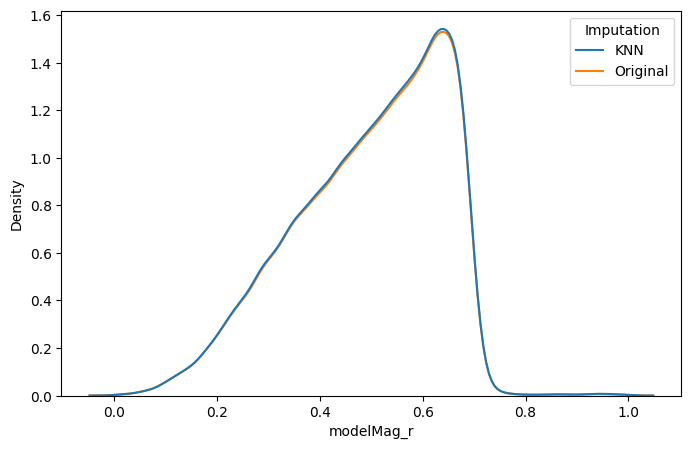

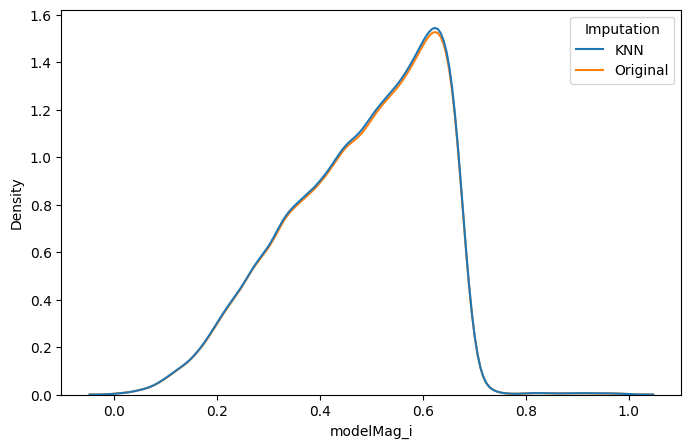

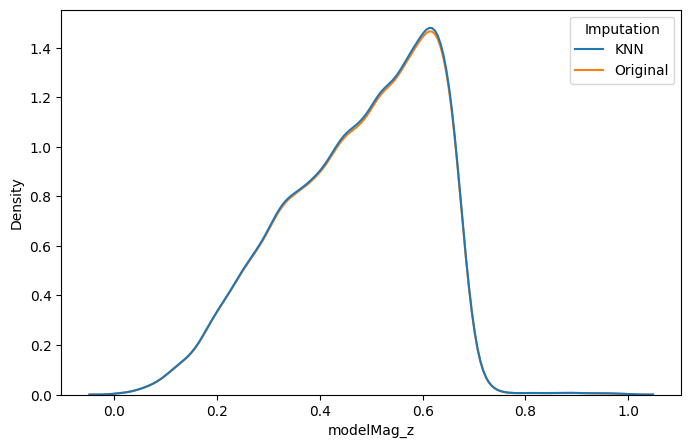

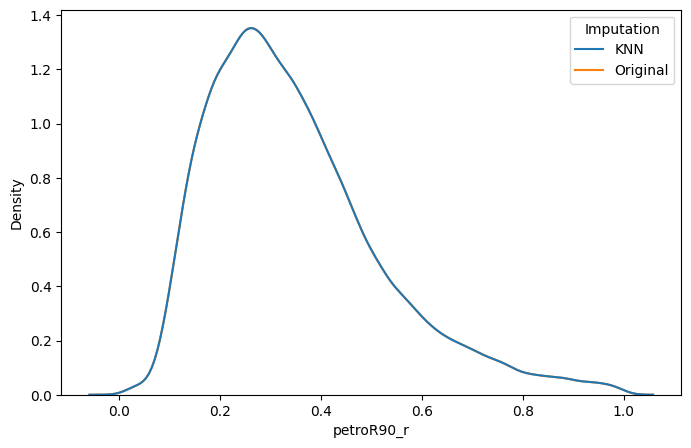

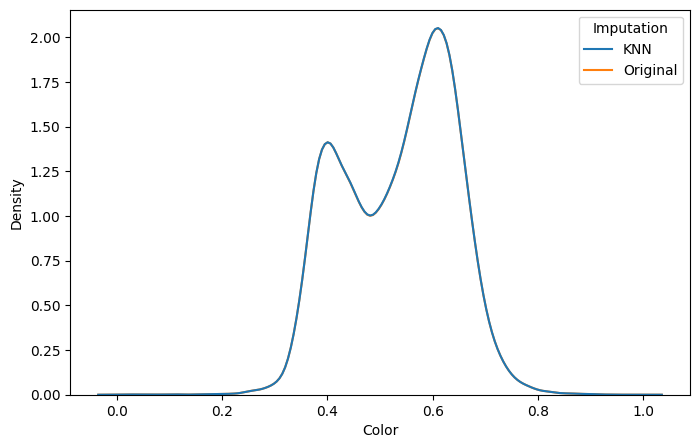

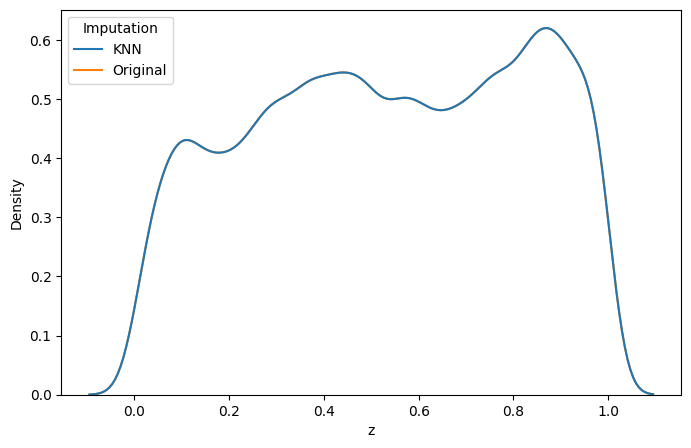

In [42]:

for column in columns_to_use: 
    del data1
    imputado = data_clean_imputada2[column].copy().to_frame()
    imputado['Imputation'] = 'KNN'
    original = data_clean[column].dropna().copy().to_frame()
    original['Imputation'] = 'Original'
    data1 = pd.concat([imputado, original])
    data1=data1.reset_index()
    fig = plt.figure(figsize=(8, 5))
    g = sns.kdeplot(data=data1, x=column, hue='Imputation')

### Aca creo el dataframe df1 que pide en la consigna.

In [43]:
df1 = data_clean_imputada2.copy()

### Cargar los valores de las imágenes correspondientes a las galaxias de df1.

Se toman las posciones angulares (ra, dec) de cada  galaxia y se descargan sus correspondientes imágenes en los filtros **g**, **r** y **z**. 

Todos los filtros para SDSS
**'Optical:SDSS**: ['SDSSg',
                  'SDSSi',
                  'SDSSr',
                  'SDSSu',
                  'SDSSz']

In [44]:
from astropy.coordinates import SkyCoord
from matplotlib.colors import LogNorm
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import ascii
from astropy import units
from astroquery.skyview import SkyView
import numpy as np
from astropy import units as u

In [45]:
# Ejemplo de una sola imagen
coords_gx = SkyCoord(df1.ra.iloc[2], df1.dec.iloc[2], unit=(u.deg, u.deg))
img = SkyView.get_images(position=coords_gx, survey=['SDSSg', 'SDSSi', 'SDSSr', 'SDSSu', 'SDSSz'])

In [46]:
# Visualización de una de las galaxias.
img[0][0].data

array([[-0.01043701, -0.01043701,  0.00843811, ...,  0.00066471,
         0.01197815,  0.00066376],
       [ 0.01220703, -0.01043701, -0.00289154, ...,  0.00444031,
        -0.0295105 , -0.0295105 ],
       [ 0.00088501, -0.02554321, -0.01800537, ...,  0.00444031,
         0.01953125, -0.01065063],
       ...,
       [ 0.05377197, -0.00278854,  0.03115845, ..., -0.00669098,
        -0.02178955,  0.00463867],
       [ 0.00852966,  0.00852966, -0.00656128, ..., -0.02178955,
         0.00086498, -0.01800537],
       [ 0.01608276,  0.03491211,  0.01608276, ...,  0.00463867,
         0.04620361, -0.00668335]], dtype=float32)

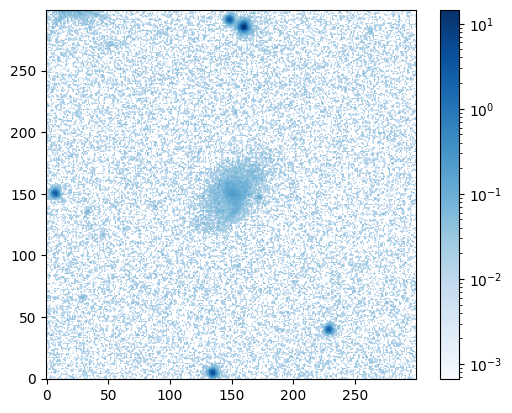

In [47]:
plt.imshow(img[0][0].data, cmap='Blues', norm=LogNorm(), origin='lower')
plt.colorbar()

Muestre:

    - Qué tamaños tienen las imágenes. 
    - Cuántas bandas/filtros tiene cada imagen.
    
Genere un dataframe (df2) en donde cada fila es una imagen y las columnas son los valores de cada px por filtro, por lo tanto, si las imagenes tienen un tamaño (Xpx, Ypx) y cunta con f filtros, entonces la cantidad de columnas de df2 son Xpx\*Ypx\*f. 

Tome una sola fila de df2 y muestre a partir de un gráfico la distribución de valores de los px en cada filtro en un rango de pxs. 

Por ultimo una df1 y df2 y guarde como un .csv

### Respuestas:

En la siguiente celda se muesta que las imagenes tienen tamaño (300,300)

In [48]:
img[0][0].data.shape

(300, 300)

Tambien se muestra que son 5 filtros `'SDSSg'`, `'SDSSi'`, `'SDSSr'`, `'SDSSu'`y `'SDSSz'`

In [49]:
display(len(img))

5

Creacion de Dataframe

In [50]:
def image_transformation(ra, dec):
    coords_gx = SkyCoord(ra, dec, unit=(u.deg, u.deg))
    img = SkyView.get_images(position=coords_gx, survey=['SDSSg', 'SDSSi', 'SDSSr', 'SDSSu', 'SDSSz'])
    SDSSg = img[0][0].data.flatten()
    SDSSi = img[0][0].data.flatten()
    SDSSr = img[0][0].data.flatten()
    SDSSu = img[0][0].data.flatten()
    SDSSz = img[0][0].data.flatten()

    result = np.concatenate([SDSSg,SDSSi,SDSSr,SDSSu,SDSSz])

    return result

In [51]:
stack = image_transformation(df1.ra[0], df1.dec[0])
%time

CPU times: total: 0 ns
Wall time: 0 ns


In [52]:
stack


array([-0.00769806, -0.04095459,  0.00227356, ..., -0.00265884,
       -0.02832031,  0.03033447], dtype=float32)

In [53]:
from math import sqrt
from joblib import Parallel, delayed

In [54]:
df1=df1.reset_index()


In [55]:
len(df1)

56556

En el sigueinte codigo creo df2 pero el problema es que la galaxia con indice 21 no puede ser encontrada y entonces el codigo arroja un 404 not found. Ademas, tarda demasiado tiempo la descarga. Realizo lo pedido solamente hasta el dato numero 20.

In [56]:
#indexs=[1,2,3,4,5,6,7,8,9]
limit=len(df1)-1

for index in range(1,20):
   # print(index)
    img = image_transformation(df1.ra.iloc[index], df1.dec.iloc[index])
    stack=np.vstack([stack,img])
    df2 =pd.DataFrame(stack)

In [57]:
df2

,0,1,2,3,4,5,6,7,8,9,...,449990,449991,449992,449993,449994,449995,449996,449997,449998,449999
0,-0.007698,-0.040955,0.002274,-0.007698,0.045471,-0.027649,-0.040955,-0.007706,-0.007706,0.008911,...,0.015656,-0.017334,-0.006332,-0.006332,0.015656,0.019348,-0.031982,-0.002659,-0.028320,0.030334
1,-0.011612,0.017517,-0.007965,-0.004326,0.024811,0.006607,0.002964,0.002964,-0.018890,-0.022522,...,0.017792,0.014145,-0.004021,-0.000387,-0.004021,0.006882,0.010513,0.010529,-0.011292,-0.000382
2,-0.010437,-0.010437,0.008438,0.008438,0.000881,0.008423,-0.025543,0.004654,-0.006676,0.012207,...,0.000863,-0.010468,0.000863,-0.036865,0.015961,0.012192,0.004639,0.004639,0.046204,-0.006683
3,0.014923,0.007248,-0.004265,0.034119,-0.004265,0.011078,0.026428,0.030243,0.076294,-0.000431,...,0.176270,0.180176,0.187744,0.156982,0.156982,0.180176,0.176270,0.160889,0.134033,0.130127
4,0.005363,-0.009720,0.009140,0.009140,-0.005951,0.012909,0.001591,-0.028564,-0.002182,0.009125,...,-0.020905,-0.051086,0.009293,0.031921,0.005524,0.009293,-0.024658,-0.020905,0.016846,-0.005798
5,0.038452,0.020721,0.020721,0.027802,0.077515,0.031372,0.066895,0.066895,0.049133,0.059753,...,-0.028198,0.008270,0.024475,0.008270,-0.060608,-0.016052,0.032593,0.008270,-0.060608,0.004219
6,-0.008438,0.009247,0.019867,0.037537,0.002144,-0.004951,-0.012039,-0.008514,0.058716,-0.026215,...,0.001432,-0.005646,0.008514,0.001431,0.001431,-0.009186,-0.030426,0.047424,0.040344,0.019135
7,0.008057,-0.011337,-0.011337,-0.015228,0.023560,0.027466,0.035217,0.015808,0.015808,0.019684,...,-0.024597,0.001856,0.039612,-0.039673,0.001860,0.001860,0.001860,-0.024567,-0.005692,0.028290
8,0.012329,-0.015228,0.028076,0.000517,-0.015228,-0.042786,0.051697,0.051697,0.004448,-0.030975,...,-0.017487,0.004890,0.027252,-0.013763,0.001158,0.004883,0.034729,0.023529,-0.006302,-0.010025
9,0.019501,0.008118,-0.022217,0.019501,0.015717,0.015717,-0.026001,-0.003258,0.008118,0.038452,...,-0.026123,0.000440,-0.003353,0.004234,-0.003353,0.000440,-0.018524,0.004234,-0.014740,0.023193


El codigo de abajo seria el correcto pero es tan grande cada dataframe que no me deja concatenarlos

Si pudiera descargar todas las imagenes se podria hacer lo que sige. Como pude descargar pocos datos, se pierden muchos datos en este ejemplo:

In [58]:
result = pd.merge(df1, df2, left_index=True, right_index=True)

In [59]:
result = result.set_index('objID')
result

,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroR90_r,z,Color,...,449990,449991,449992,449993,449994,449995,449996,449997,449998,449999
objID,,,,,,,,,,,,,,,,,,,,,
"1,23765119242489E+018",116.519097,39.886407,0.553568,0.483546,0.487291,0.478034,0.479818,0.321472,0.717351,0.648141,...,0.015656,-0.017334,-0.006332,-0.006332,0.015656,0.019348,-0.031982,-0.002659,-0.028320,0.030334
"1,23765149575578E+018",116.451900,41.421270,0.625280,0.410267,0.354609,0.333056,0.319132,0.376008,0.673681,0.375909,...,0.017792,0.014145,-0.004021,-0.000387,-0.004021,0.006882,0.010513,0.010529,-0.011292,-0.000382
"1,23767370611537E+018",115.946713,41.918877,0.715287,0.593262,0.582306,0.569730,0.582890,0.444233,0.146169,0.620548,...,0.000863,-0.010468,0.000863,-0.036865,0.015961,0.012192,0.004639,0.004639,0.046204,-0.006683
"1,2376737066523E+018",116.051943,42.287231,0.885630,0.964946,0.938184,0.895000,0.861377,0.029684,0.637896,0.566071,...,0.176270,0.180176,0.187744,0.156982,0.156982,0.180176,0.176270,0.160889,0.134033,0.130127
"1,23765127349266E+018",117.287392,43.434782,0.838089,0.684301,0.651423,0.637002,0.631795,0.495061,0.753031,0.595081,...,-0.020905,-0.051086,0.009293,0.031921,0.005524,0.009293,-0.024658,-0.020905,0.016846,-0.005798
"1,23765439217644E+018",118.240207,39.303836,0.919033,0.674505,0.591021,0.548654,0.524881,0.146001,0.688396,0.420704,...,-0.028198,0.008270,0.024475,0.008270,-0.060608,-0.016052,0.032593,0.008270,-0.060608,0.004219
"1,23765119135154E+018",118.113313,40.326451,0.695096,0.587521,0.590535,0.584084,0.579302,0.310925,0.726213,0.653874,...,0.001432,-0.005646,0.008514,0.001431,0.001431,-0.009186,-0.030426,0.047424,0.040344,0.019135
"1,23765149629429E+018",118.716505,44.919518,0.694955,0.548273,0.527520,0.512923,0.523495,0.514657,0.850384,0.560302,...,-0.024597,0.001856,0.039612,-0.039673,0.001860,0.001860,0.001860,-0.024567,-0.005692,0.028290
"1,23767370557974E+018",119.822479,42.008528,0.474370,0.284476,0.236058,0.213425,0.197158,0.735572,0.788147,0.357208,...,-0.017487,0.004890,0.027252,-0.013763,0.001158,0.004883,0.034729,0.023529,-0.006302,-0.010025


In [60]:
result.to_csv('result.csv')

# Componentes Principales 

Ajuste el modelo de CPA  al df1 con n=3 el número de componentes principales. Grafique.

In [61]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d.art3d import Line3D

In [62]:
# Seleccionar las columnas relevantes para el ACP
features = ['modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i', 'modelMag_z', 'petroR90_r', 'z','Color']

In [63]:
# Realizar la normalización de las características
normalized_features = (df1[features] - df1[features].mean()) / df1[features].std()

In [64]:
# Crear una instancia del modelo de PCA con n = 3
pca = PCA(n_components=3)

In [65]:
# Ajustar el modelo a los datos normalizados
pca.fit(normalized_features)

PCA(n_components=3)

In [66]:
# Transformar los datos originales a los componentes principales
components = pca.transform(normalized_features)

In [67]:
# Crear un DataFrame con los componentes principales
df_components = pd.DataFrame(data=components, columns=['Componente 1', 'Componente 2', 'Componente 3'])

In [68]:
# Mapear los valores de texto a colores
class_colors = {'S': 'red', 'E': 'blue'}  # Agrega más colores y mapeos si es necesario

In [69]:
# Obtener los colores correspondientes a cada punto
colors = np.array([class_colors.get(clase, 'black') for clase in df1['clase']])

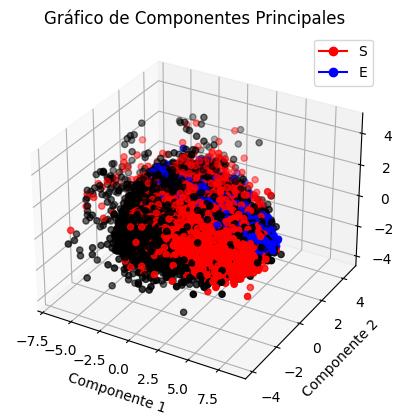

In [70]:
# Graficar los componentes principales en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_components['Componente 1'], df_components['Componente 2'], df_components['Componente 3'], c=colors)
ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')
ax.set_zlabel('Componente 3')

# Crear los elementos de leyenda personalizados
legend_elements = [Line3D([0], [0], [0], marker='o', color=color, label=clase) for clase, color in class_colors.items()]
ax.legend(handles=legend_elements)

plt.title('Gráfico de Componentes Principales')
plt.show()

In [72]:
vr = pca.explained_variance_ratio_


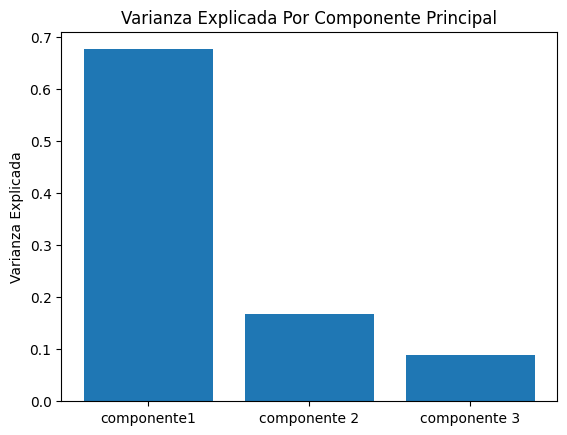

In [73]:
plt.bar(x=['componente1','componente 2','componente 3'],height=vr)
plt.title('Varianza Explicada Por Componente Principal')

plt.ylabel('Varianza Explicada')
plt.show()